In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

In [1]:
import kmeans, simulatedData, time
from kmeans import kmeansplusplus, kmeansparallel, kmeans
from simulatedData import generate_data

In [2]:
# test on simulated data
# set number of clusters
k=4
# set variance for simulation
R = 100
# set dimensions
d=15
# set number of points to generate
npoints = 100000
# generate data
sim_data = generate_data(k,R,d, npoints)

### Timings

In [3]:
# set parameters
k = 50
l=k/2
d = 15
r = 1

In [4]:
sim_data.shape

(100000, 15)

#### Timing selecting centers only

In [15]:
%timeit kmeansplusplus(sim_data, k, d)

KeyboardInterrupt: 

In [ ]:
%timeit kmeansparallel(sim_data, k, l, r)

#### Timing selecting centers and clustering

In [ ]:
%timeit kmeans(sim_data, kmeansplusplus(sim_data, k, d), k, d)

In [ ]:
%timeit kmeans(sim_data, kmeansparallel(sim_data, k, l, r), k, d)

### Clustering

In [28]:
sim_data_k4 = generate_data(k=4, var=100, dim=2, npoints=10000)

In [29]:
k = 4
l=k/2
d = 2
r = 1

In [30]:
sim_plus = kmeans(sim_data_k4, kmeansplusplus(sim_data_k4, k, d), k, d)

In [31]:
x_plus = sim_plus[0][:,0]
y_plus = sim_plus[0][:,1]
labels_plus = sim_plus[1]

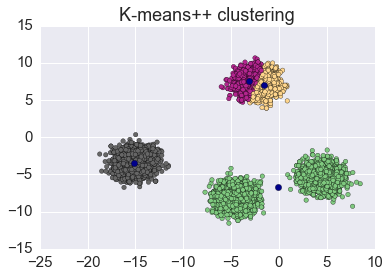

In [32]:
plt.figure()
plt.scatter(sim_data_k4[:,0], sim_data_k4[:,1], c=labels_plus, cmap='Accent')
plt.scatter(x_plus, y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

In [35]:
sim_para = kmeansparallel(sim_data_k4, k, l, r)

In [ ]:
x_para = sim_para[0][:,0]
y_para = sim_para[0][:,1]
labels_para = sim_para[1]

In [ ]:
plt.figure()
plt.scatter(sim_data_k4[:,0], sim_data_k4[:,1], c=labels_para, cmap='Accent')
plt.scatter(x_para, y_para, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

### old stuff from real data set

In [1]:
real_data=pd.read_csv('./data/spambase.data', header=None)

In [2]:
real_data.drop(real_data.columns[57], axis=1, inplace=True)

In [4]:
real_data=np.array(real_data)
k=2
d=real_data.shape[1]
res_plus = kmeans(real_data,kmeansplusplus(real_data,k,d),k, d)